# Model performance

In this notebook we evaluate our models' performances against the data in the test set. We find that the K-Nearest Neighbors model outperforms all the other models in the test set. We include a bar chart containing each model's performance when assessed by its test mean squared error.

In [21]:
import sys

sys.path.insert(0, "../src")

In [22]:
import matplotlib.pyplot as plt

plt.style.use("customstyle.mplstyle")

In [23]:
import pandas as pd
from pathlib import Path

DATA_FOLDER = Path("../data")
MODELS_FOLDER = Path("../models/regression")

collisions = pd.read_pickle(DATA_FOLDER / "final_dataset_test.pkl")
collisions = collisions[collisions["has_volume_meas"]]

In [24]:
X_test = collisions.drop(
    columns=[
        "physicalid",
        "geometry",
        "has_parking_meters",
        "collision_rate",
        "collision_rate_per_length",
        "has_volume_meas",
    ]
)

y_test = collisions["collision_rate_per_length"]

In [25]:
from sklearn.metrics import mean_squared_error
from model_helpers.feature_transformers import LogarithmTransfomer, InverseTransformer
from model_helpers.model_loader import ModelLoader

In [26]:
baseline = ModelLoader().load("baseline")
linear_reg = ModelLoader().load("linear")
knn = ModelLoader().load("knn")
forest_reg = ModelLoader().load("random_forest")
xgboost = ModelLoader().load("xgboost")

In [27]:
def calculate_model_score(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

In [28]:
models = [baseline, linear_reg, knn, forest_reg, xgboost]
model_names = ["Baseline", "Linear", "K-NN", "Random forest", "XGBoost"]
scores = [calculate_model_score(model, X_test, y_test) for model in models]

Text(0.5, 0, 'Regression model')

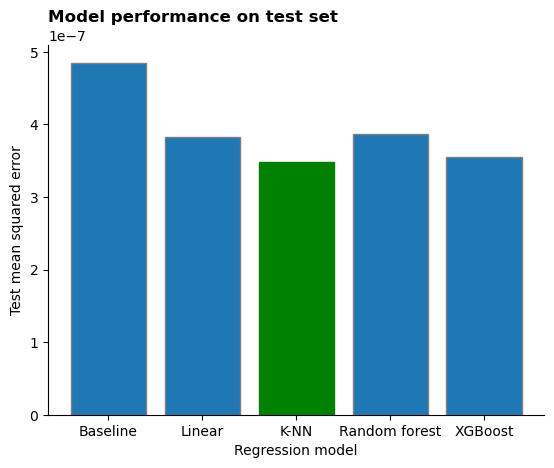

In [29]:
barlist = plt.bar(model_names, scores, edgecolor="grey")
barlist[2].set_color("green")
plt.title("Model performance on test set")
plt.ylabel("Test mean squared error")
plt.xlabel("Regression model")

In [30]:
pd.DataFrame(scores, index=model_names, columns=["mse"]).sort_values(by="mse")

,mse
K-NN,3.484035e-07
XGBoost,3.555349e-07
Linear,3.829722e-07
Random forest,3.865000e-07
Baseline,4.850881e-07
